# Unsupervised Learning
   No Features i.e. Columns is present in the given data.

## Clustering
Clustering is the task of dividing the unlabeled data or data points into different clusters such that similar data points fall in the same cluster than those which differ from the others. In simple words, the aim of the clustering process is to segregate groups with similar traits and assign them into clusters.

### Types of Clustering
    1. Soft Clustering
    2. Hard Clustering

## K-means Algorithm (Implementation):   

[[ 7.         23.8       ]
 [25.         70.5       ]
 [65.66666667 25.66666667]]


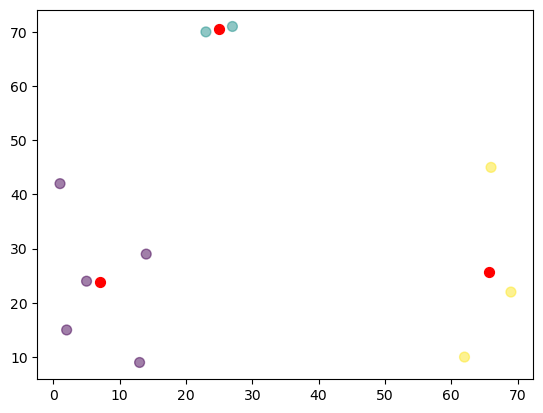

In [7]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

points={'A' : [13,14,2,5,23,27,66,1,69,62],
       'B' : [9,29,15,24,70,71,45,42,22,10]
       }
data= DataFrame(points,columns=['A','B'])

kpoints = KMeans(n_clusters=3, init='random').fit(data)
center= kpoints.cluster_centers_
print(center)

plt.scatter(data['A'],data['B'], c= kpoints.labels_.astype(float),s=50, alpha=0.5)
plt.scatter(center[:,0], center[:,1], c="red", s=50)
plt.show()

[[ 7.         23.8       ]
 [65.66666667 25.66666667]
 [25.         70.5       ]]


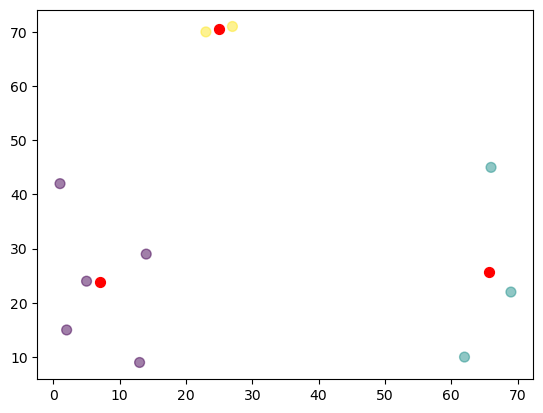

In [9]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

points={'A' : [13,14,2,5,23,27,66,1,69,62],
       'B' : [9,29,15,24,70,71,45,42,22,10]
       }
data= DataFrame(points,columns=['A','B'])

kpoints = KMeans(n_clusters=3, init='k-means++').fit(data)
center= kpoints.cluster_centers_
print(center)

plt.scatter(data['A'],data['B'], c= kpoints.labels_.astype(float),s=50, alpha=0.5)
plt.scatter(center[:,0], center[:,1], c="red", s=50)
plt.show()

### Create Dataset using Sci-Kit Learn 

(150, 2)


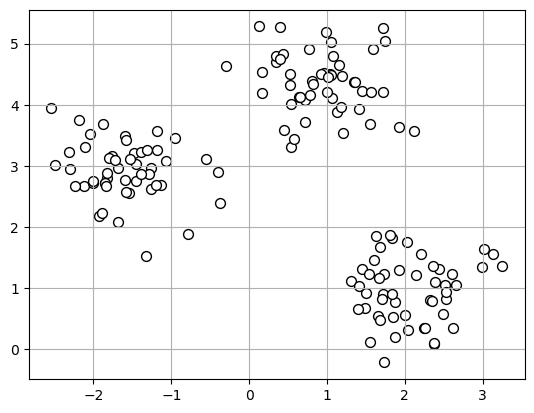

In [10]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=150,n_features=2, centers=3, cluster_std=0.5,shuffle=True,random_state=0)
print(X.shape)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c='white',edgecolor='black',marker='o',s=50)
plt.grid()
plt.show()

## Dendrogram/ Hierarchical Clustering (Implementation):

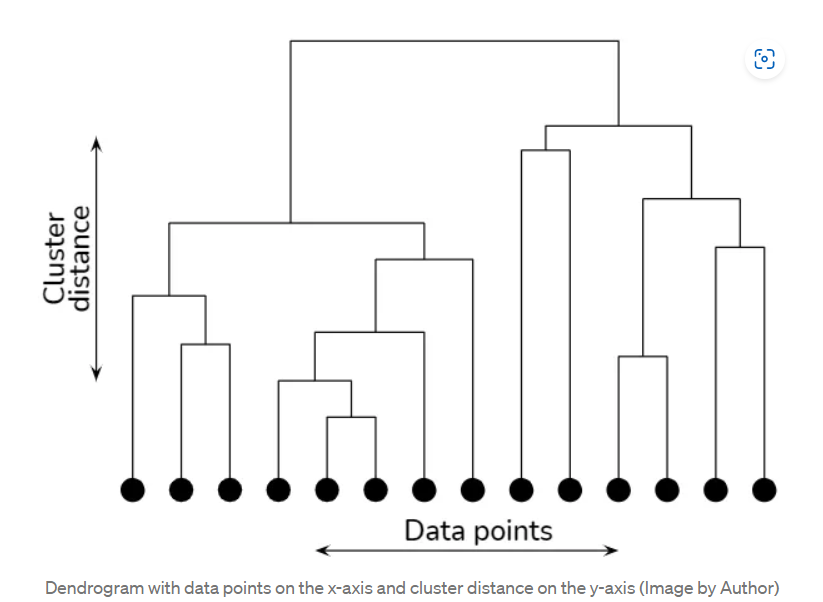

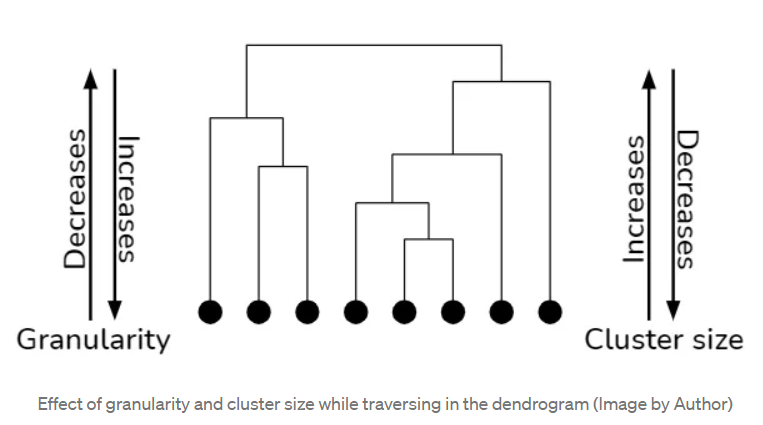

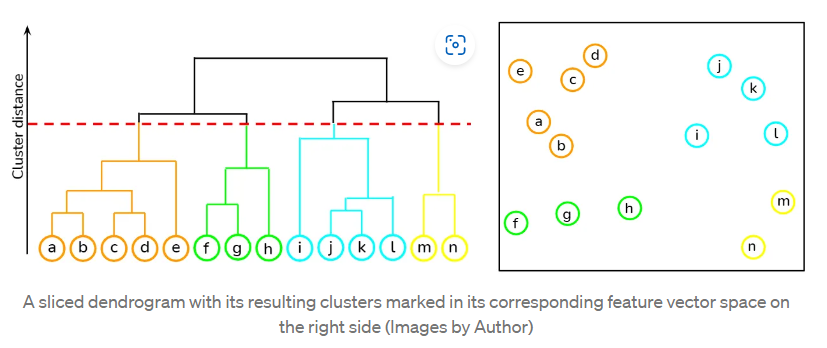

### Create a Dataset 

In [12]:
import pandas as pd
import numpy as np
variables=['x','y','z']
labels=['ID1','ID2','ID3','ID4','ID5']
X=np.random.random([5,3])*10
df=pd.DataFrame(X,columns=variables,index=labels)
print(df)

            x         y         z
ID1  8.170438  7.589932  6.264236
ID2  5.789140  8.261941  0.697952
ID3  9.396413  0.105191  0.819677
ID4  1.191893  2.237993  0.781815
ID5  8.228699  8.616863  9.969195


### Calculate distance matrix as input to hierarchical clustering

In [13]:
from scipy.spatial.distance import pdist,squareform
row_dist=pd.DataFrame(squareform(pdist(df,metric='euclidean')),
                      columns=labels,index=labels)
print(row_dist)

           ID1       ID2        ID3        ID4        ID5
ID1   0.000000  6.091444   9.336359  10.363410   3.845089
ID2   6.091444  0.000000   8.919631   7.578237   9.593402
ID3   9.336359  8.919631   0.000000   8.477288  12.550929
ID4  10.363410  7.578237   8.477288   0.000000  13.214181
ID5   3.845089  9.593402  12.550929  13.214181   0.000000


### Calculate Linkage Matrix

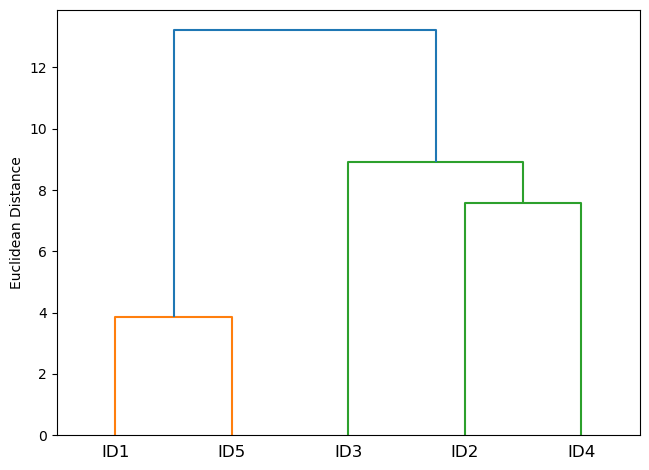

In [14]:
from scipy.cluster.hierarchy import linkage
row_clusters=linkage(df.values,method='complete',metric='euclidean')
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
row_dendr=dendrogram(row_clusters,labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

### Heatmap

            x         y         z
ID4  1.191893  2.237993  0.781815
ID2  5.789140  8.261941  0.697952
ID3  9.396413  0.105191  0.819677
ID5  8.228699  8.616863  9.969195
ID1  8.170438  7.589932  6.264236


C:\Users\tarun\AppData\Local\Temp\ipykernel_12136\3610782791.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels(['']+list(df_rowclust.columns))
C:\Users\tarun\AppData\Local\Temp\ipykernel_12136\3610782791.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels(['']+list(df_rowclust.index))


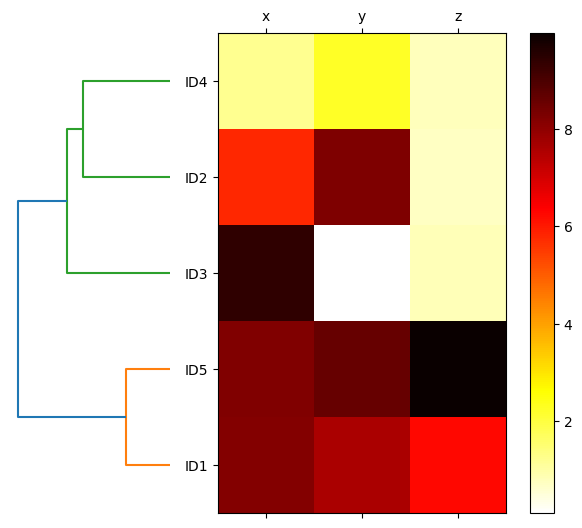

In [16]:

fig=plt.figure(figsize=(8,8), facecolor='white')
axd=fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr=dendrogram(row_clusters,orientation='left')

df_rowclust=df.iloc[row_dendr['leaves'][::-1]]
print(df_rowclust)
axm=fig.add_axes([0.23,0.1,0.6,0.6])
cax=axm.matshow(df_rowclust,interpolation='nearest',cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))
plt.show()